In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel("C:/Users/PRAVEEN/Desktop/unified mentor/Entertainer.xlsx")


In [4]:
data.head()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough,Breakthrough Name,Year of First Oscar,Year of Last Major Work,Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


In [5]:
data.tail()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough,Breakthrough Name,Year of First Oscar,Year of Last Major Work,Year of Death
65,Tom Hanks,M,1956,1984,Splash,1993.0,2016,NaN
66,Tony Bennett,M,1926,1951,Because of You,1963.0,2016,NaN
67,Wayne Newton,M,1942,1972,"Daddy, Don't You Walk So Fast",NaN,2016,NaN
68,Will Smith,M,1968,1990,The Fresh Prince of Bel-Air,1988.0,2016,NaN
69,Willie Nelson,M,1933,1975,Red Headed Stranger,1976.0,2016,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entertainer               70 non-null     object 
 1   Gender (traditional)      70 non-null     object 
 2   Birth Year                70 non-null     int64  
 3   Year of Breakthrough      70 non-null     int64  
 4   Breakthrough Name         70 non-null     object 
 5   Year of First Oscar       64 non-null     float64
 6   Year of Last Major Work   70 non-null     int64  
 7   Year of Death             30 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.5+ KB


In [7]:
data.nunique()

Entertainer                 70
Gender (traditional)         2
Birth Year                  43
Year of Breakthrough        50
Breakthrough Name           69
Year of First Oscar         44
Year of Last Major Work     29
Year of Death               21
dtype: int64

In [8]:
data.isnull()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough,Breakthrough Name,Year of First Oscar,Year of Last Major Work,Year of Death
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
65,False,False,False,False,False,False,False,True
66,False,False,False,False,False,False,False,True
67,False,False,False,False,False,True,False,True
68,False,False,False,False,False,False,False,True


In [9]:
data.isnull().sum()

Entertainer                  0
Gender (traditional)         0
Birth Year                   0
Year of Breakthrough         0
Breakthrough Name            0
Year of First Oscar          6
Year of Last Major Work      0
Year of Death               40
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth Year,70.0,1935.585714,24.135783,1889.0,1916.0,1935.5,1954.00,1988.0
Year of Breakthrough,70.0,1964.228571,22.411935,1915.0,1949.5,1963.5,1983.50,2008.0
Year of First Oscar,64.0,1976.234375,22.170152,1929.0,1962.0,1978.0,1993.00,2017.0
Year of Last Major Work,70.0,1998.971429,22.874561,1933.0,1980.0,2014.0,2016.00,2016.0
Year of Death,30.0,1988.133333,20.483355,1942.0,1977.0,1989.5,2003.75,2016.0


In [11]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Entertainer', 'Gender (traditional)', 'Breakthrough Name'], dtype='object')
Numerical Variables:
['Birth Year', 'Year of Breakthrough', 'Year of First Oscar', 'Year of Last Major Work ', 'Year of Death']


Birth Year
Skew : 0.15


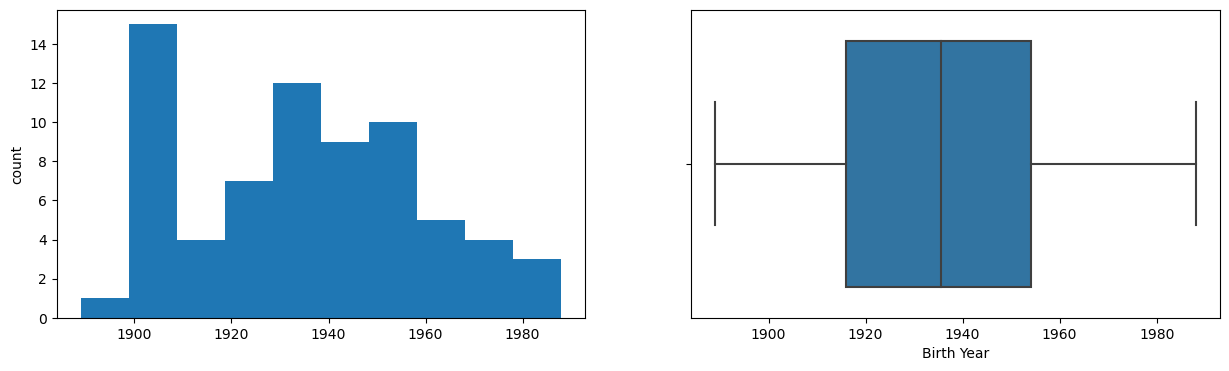

Year of Breakthrough
Skew : -0.04


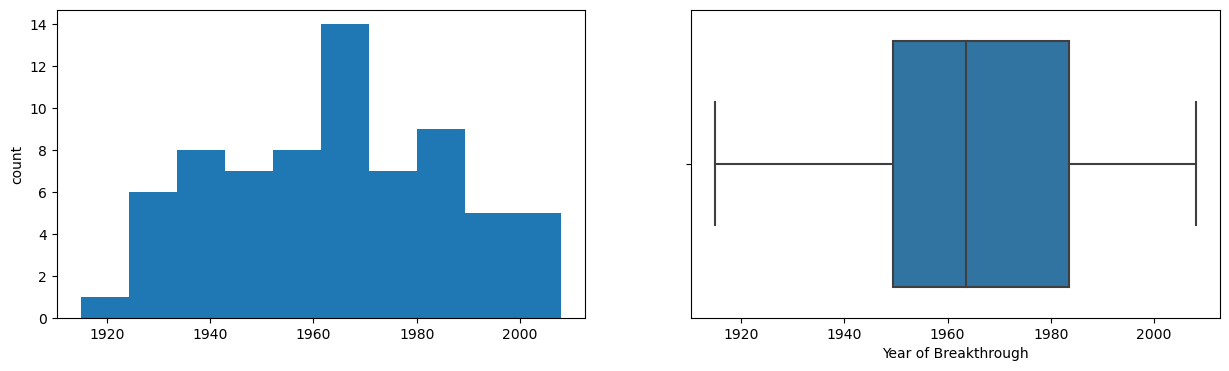

Year of First Oscar
Skew : -0.25


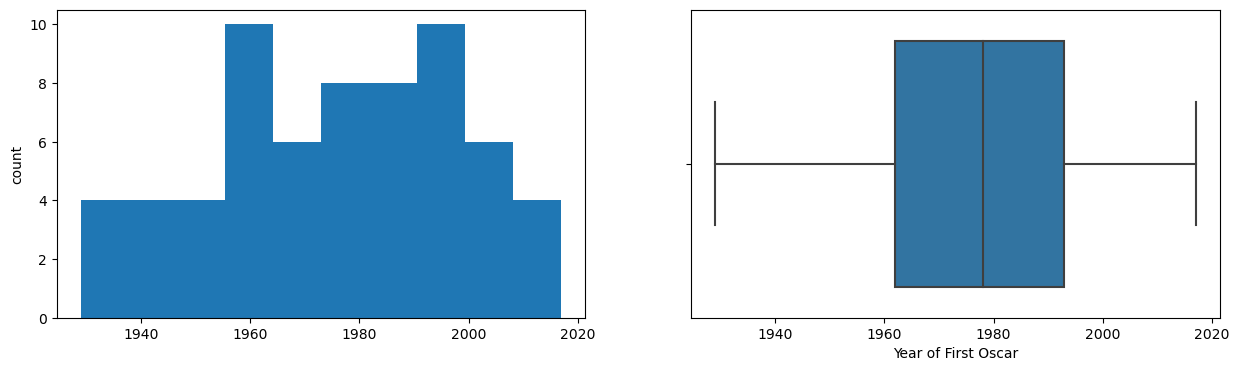

Year of Last Major Work 
Skew : -1.18


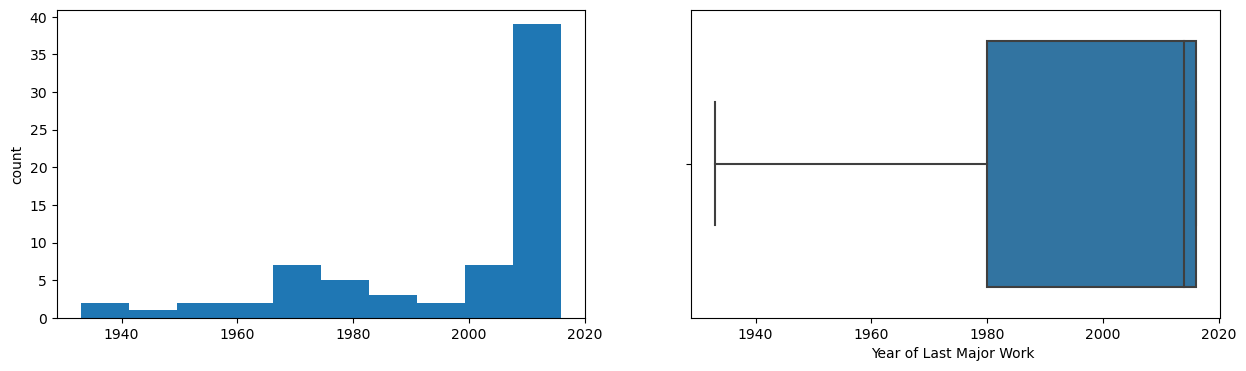

Year of Death
Skew : -0.36


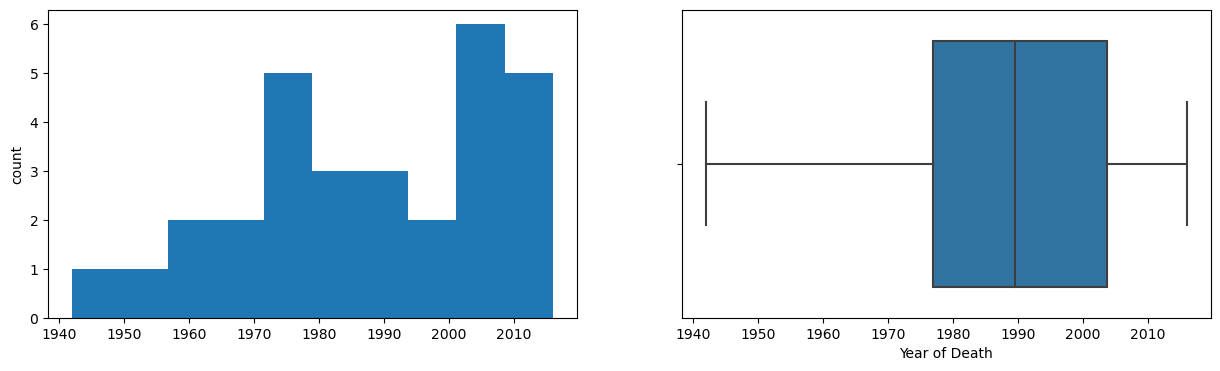

In [12]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

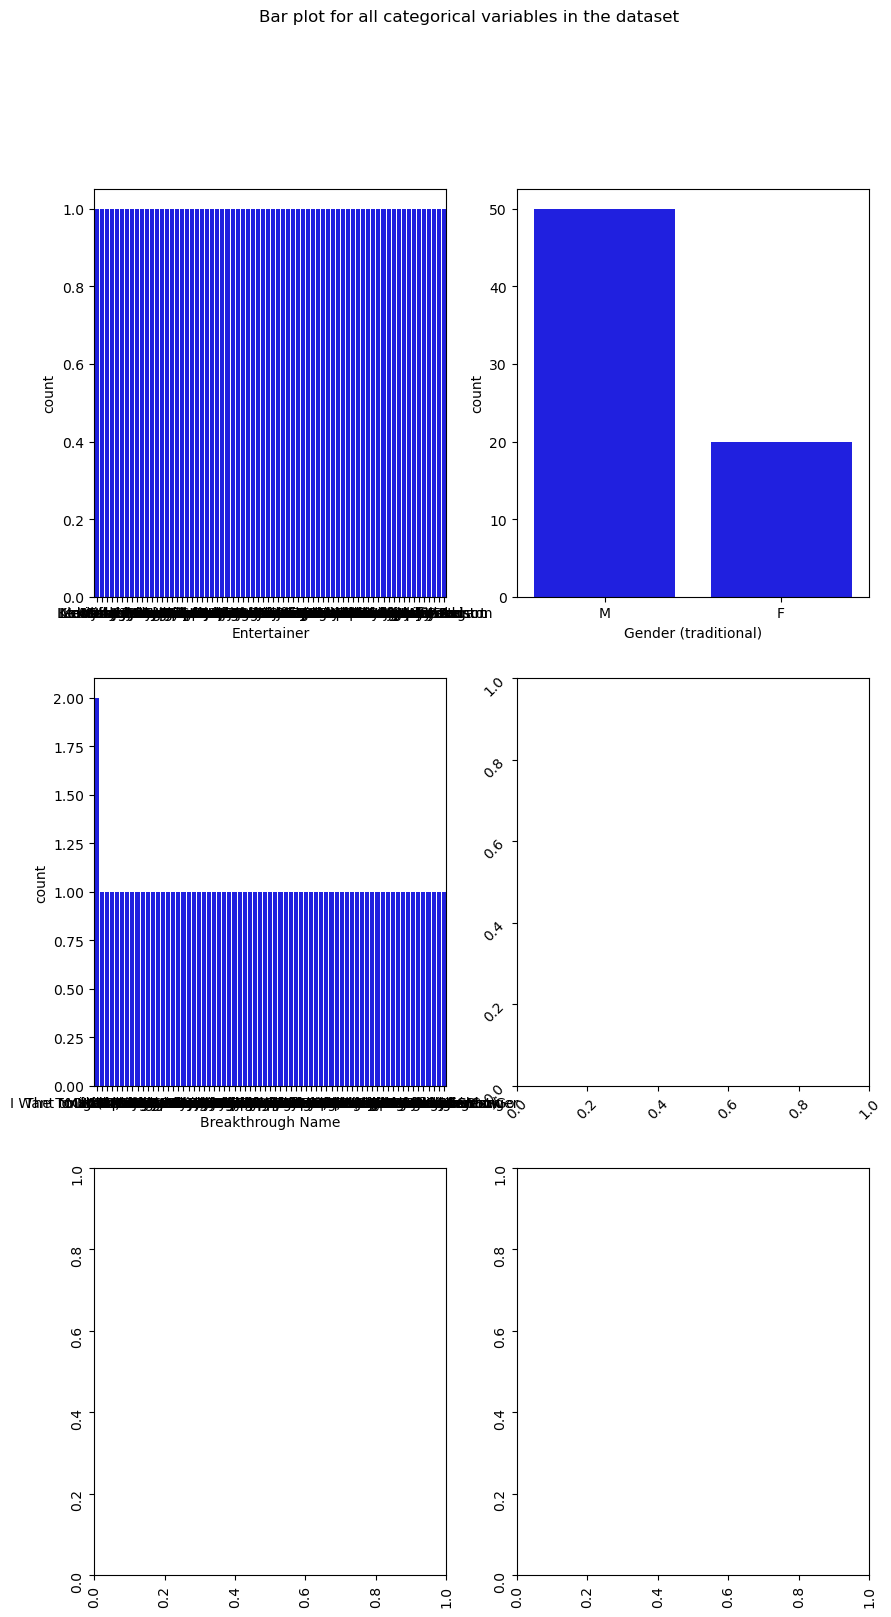

In [13]:
fig, axes = plt.subplots(3, 2, figsize = (10, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Entertainer', data = data, color = 'blue', 
              order = data['Entertainer'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Gender (traditional)', data = data, color = 'blue', 
              order = data['Gender (traditional)'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Breakthrough Name', data = data, color = 'blue', 
              order = data['Breakthrough Name'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [14]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [15]:
log_transform(data,['Year of Breakthrough', 'Year of First Oscar'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entertainer               70 non-null     object 
 1   Gender (traditional)      70 non-null     object 
 2   Birth Year                70 non-null     int64  
 3   Year of Breakthrough      70 non-null     int64  
 4   Breakthrough Name         70 non-null     object 
 5   Year of First Oscar       64 non-null     float64
 6   Year of Last Major Work   70 non-null     int64  
 7   Year of Death             30 non-null     float64
 8   Year of Breakthrough_log  70 non-null     float64
 9   Year of First Oscar_log   64 non-null     float64
dtypes: float64(4), int64(3), object(3)
memory usage: 5.6+ KB


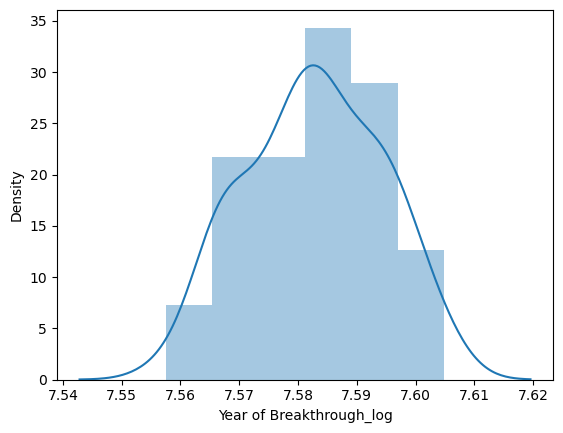

In [16]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Year of Breakthrough_log"], axlabel="Year of Breakthrough_log");

<Figure size 1300x1700 with 0 Axes>

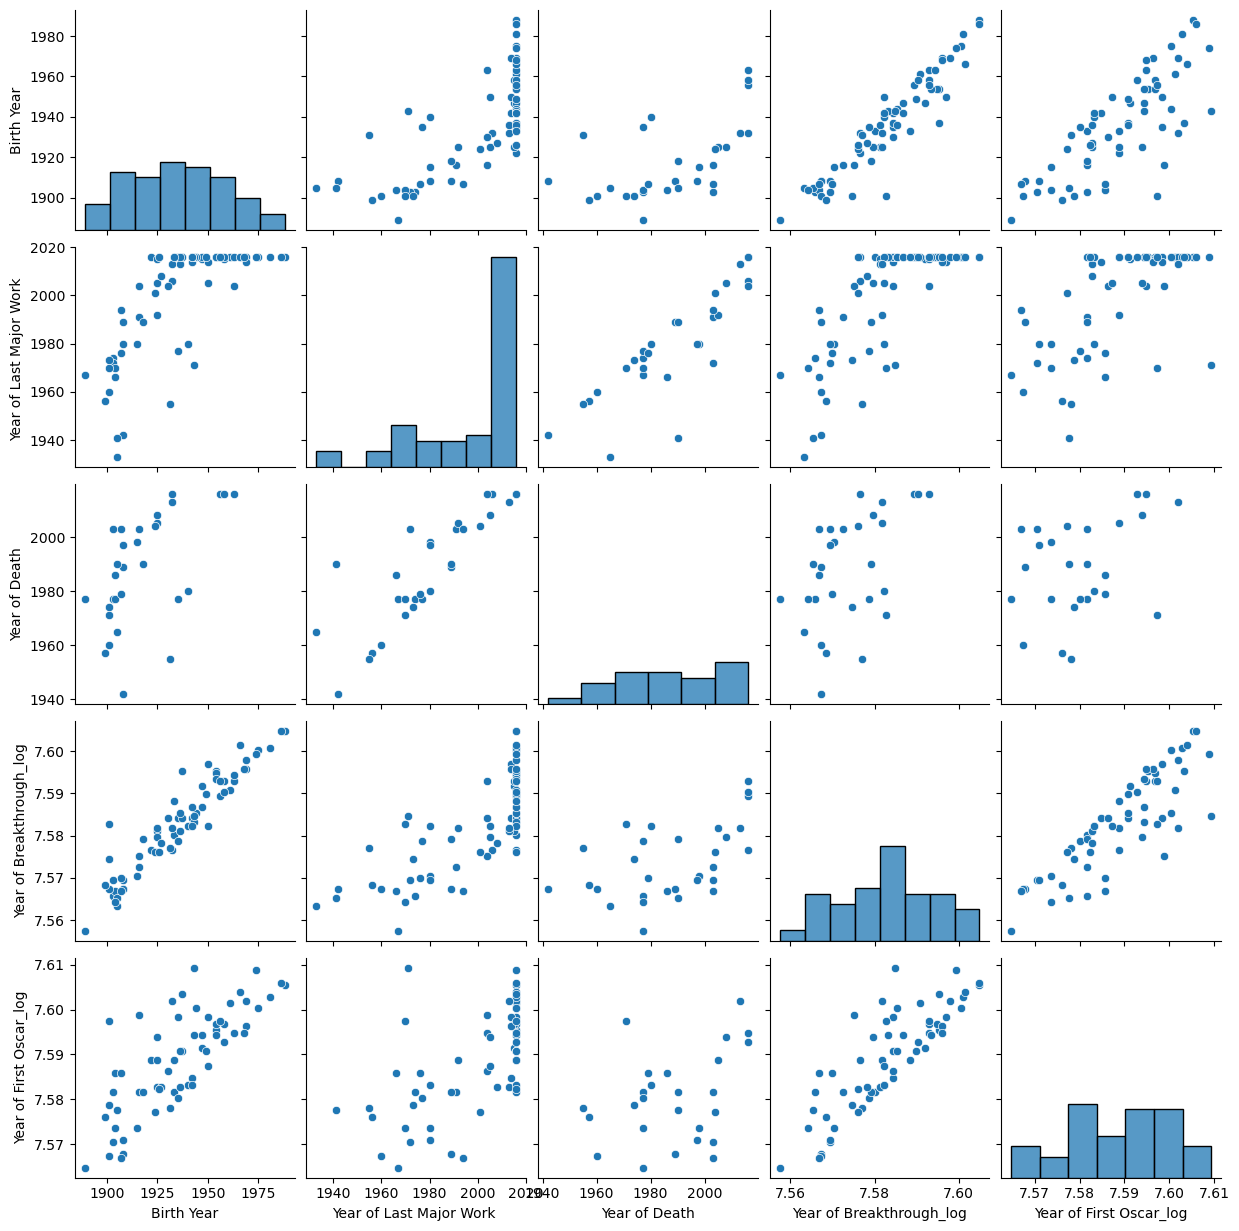

In [17]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Year of Breakthrough', 'Year of First Oscar'],axis=1))
plt.show()

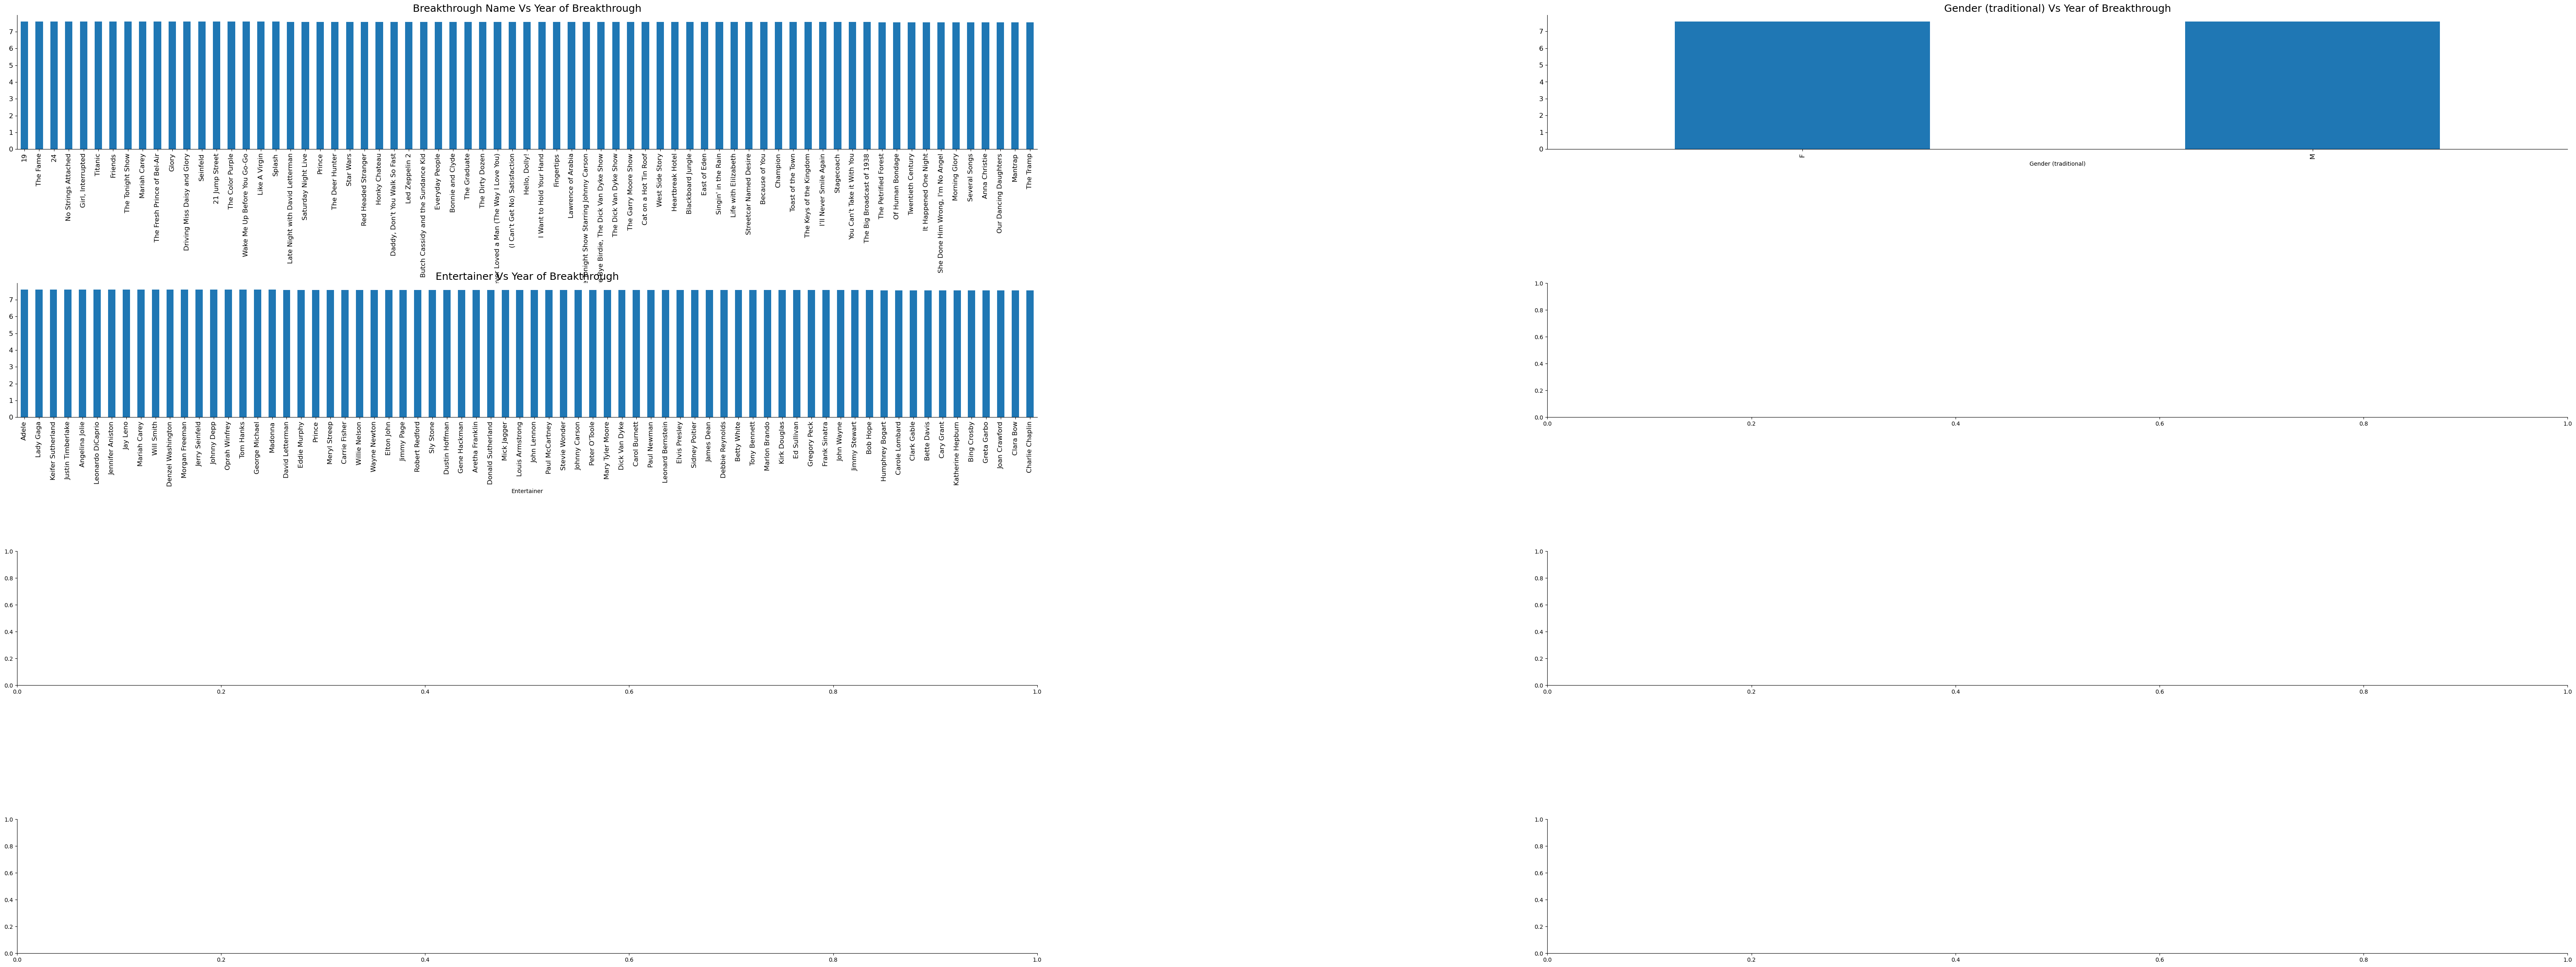

In [33]:
fig, axarr = plt.subplots(4, 2, figsize=(81, 30))
data.groupby('Breakthrough Name')['Year of Breakthrough_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Breakthrough Name Vs Year of Breakthrough", fontsize=18)
data.groupby('Gender (traditional)')['Year of Breakthrough_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Gender (traditional) Vs Year of Breakthrough", fontsize=18)
data.groupby('Entertainer')['Year of Breakthrough_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Entertainer Vs Year of Breakthrough", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()